# DS 670 CAPSTONE PROJECT 

In [2]:
!pip install -U imbalanced-learn smote-variants

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [13]:
# Load your CSV file

df = pd.read_csv('C:\\Users\\vasud\\OneDrive\\Desktop\\DS 670 ASSIGNMENTS\\DS670 dataset.csv')


In [14]:
df.head()

,Reference-Number,Control-Number,Financial-Institution-Number,Deposit-Business-Date,Financial-Institution-Business-Date,Financial-Institution-Transaction-Date,Financial-Institution-Transaction-Type-Code,Financial-Institution-Transaction-Amount,Authorization-Number
0,39909909,2.023090e+14,10,4/3/2023,4/3/2023,4/3/2023,DEP,41317.17,100030
1,39909910,2.023090e+14,10,4/3/2023,4/3/2023,4/3/2023,DEP,2200.00,611053
2,39909911,2.023090e+14,10,4/3/2023,4/3/2023,4/3/2023,DEP,100.00,611057
3,39909912,2.023090e+14,10,4/3/2023,4/3/2023,4/3/2023,DEP,500.00,611064
4,39909913,2.023090e+14,10,4/3/2023,4/3/2023,4/3/2023,DEP,640.00,1420428


In [15]:
df.describe()

,Reference-Number,Control-Number,Financial-Institution-Number,Financial-Institution-Transaction-Amount
count,1.048575e+06,1.038798e+06,1.048575e+06,1.048575e+06
mean,4.056600e+07,2.023369e+14,2.111937e+02,5.980656e+04
std,3.743636e+05,3.156476e+10,3.537028e+02,2.583904e+07
min,3.990991e+07,2.023090e+14,1.000000e+00,-3.772530e+09
25%,4.024587e+07,2.023180e+14,3.000000e+00,1.600000e+02
50%,4.056112e+07,2.023250e+14,3.000000e+00,9.600000e+02
75%,4.088811e+07,2.023340e+14,8.090000e+02,1.038330e+04
max,4.121948e+07,2.024090e+14,8.990000e+02,1.000000e+09


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Reference-Number                             1048575 non-null  int64  
 1   Control-Number                               1038798 non-null  float64
 2   Financial-Institution-Number                 1048575 non-null  int64  
 3   Deposit-Business-Date                        1048575 non-null  object 
 4   Financial-Institution-Business-Date          1048575 non-null  object 
 5   Financial-Institution-Transaction-Date       1048575 non-null  object 
 6   Financial-Institution-Transaction-Type-Code  1048575 non-null  object 
 7   Financial-Institution-Transaction-Amount     1048575 non-null  float64
 8   Authorization-Number                         1047109 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage

In [17]:
# Check for missing values
missing_values = df.isnull().sum()

# Display the summary of missing values
print("Missing Values Summary:")
print(missing_values)

Missing Values Summary:
Reference-Number                                  0
Control-Number                                 9777
Financial-Institution-Number                      0
Deposit-Business-Date                             0
Financial-Institution-Business-Date               0
Financial-Institution-Transaction-Date            0
Financial-Institution-Transaction-Type-Code       0
Financial-Institution-Transaction-Amount          0
Authorization-Number                           1466
dtype: int64


In [19]:
# Impute missing values
df['Control-Number'].fillna(df['Control-Number'].mean(), inplace=True)
df['Authorization-Number'].fillna(method='ffill', inplace=True)

# Check if there are still any missing values
missing_values_after_imputation = df.isnull().sum()

# Display the summary of missing values after imputation
print("Missing Values Summary After Imputation:")
print(missing_values_after_imputation)

C:\Users\vasud\AppData\Local\Temp\ipykernel_15180\721746494.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Control-Number'].fillna(df['Control-Number'].mean(), inplace=True)
C:\Users\vasud\AppData\Local\Temp\ipykernel_15180\721746494.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

Missing Values Summary After Imputation:
Reference-Number                               0
Control-Number                                 0
Financial-Institution-Number                   0
Deposit-Business-Date                          0
Financial-Institution-Business-Date            0
Financial-Institution-Transaction-Date         0
Financial-Institution-Transaction-Type-Code    0
Financial-Institution-Transaction-Amount       0
Authorization-Number                           0
dtype: int64


In [20]:
# Summary statistics for numerical columns
print(df.describe())


       Reference-Number  Control-Number  Financial-Institution-Number  \
count      1.048575e+06    1.048575e+06                  1.048575e+06   
mean       4.056600e+07    2.023369e+14                  2.111937e+02   
std        3.743636e+05    3.141725e+10                  3.537028e+02   
min        3.990991e+07    2.023090e+14                  1.000000e+00   
25%        4.024587e+07    2.023180e+14                  3.000000e+00   
50%        4.056112e+07    2.023250e+14                  3.000000e+00   
75%        4.088811e+07    2.023340e+14                  8.090000e+02   
max        4.121948e+07    2.024090e+14                  8.990000e+02   

       Financial-Institution-Transaction-Amount  
count                              1.048575e+06  
mean                               5.980656e+04  
std                                2.583904e+07  
min                               -3.772530e+09  
25%                                1.600000e+02  
50%                                9.60000

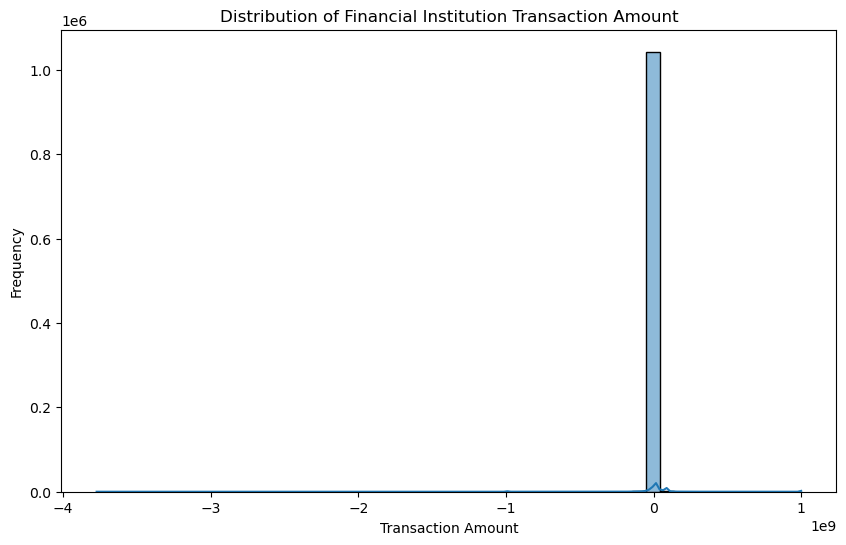

In [21]:
# Plot histogram of Financial-Institution-Transaction-Amount
plt.figure(figsize=(10, 6))
sns.histplot(df['Financial-Institution-Transaction-Amount'], bins=50, kde=True)
plt.title('Distribution of Financial Institution Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

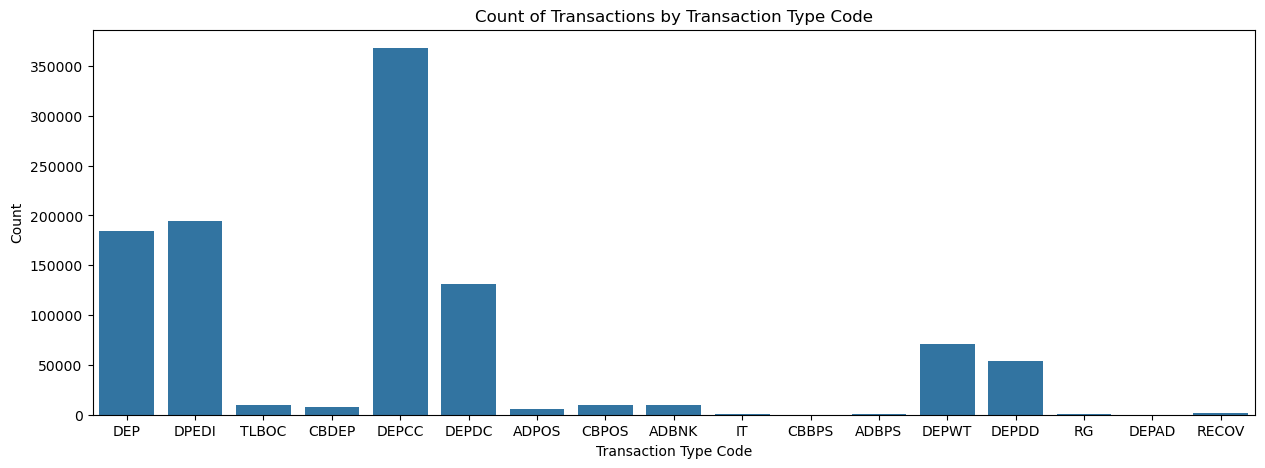

In [23]:
# Plot a bar chart of Financial-Institution-Transaction-Type-Code
plt.figure(figsize=(15, 5))
sns.countplot(x='Financial-Institution-Transaction-Type-Code', data=df)
plt.title('Count of Transactions by Transaction Type Code')
plt.xlabel('Transaction Type Code')
plt.ylabel('Count')
plt.show()

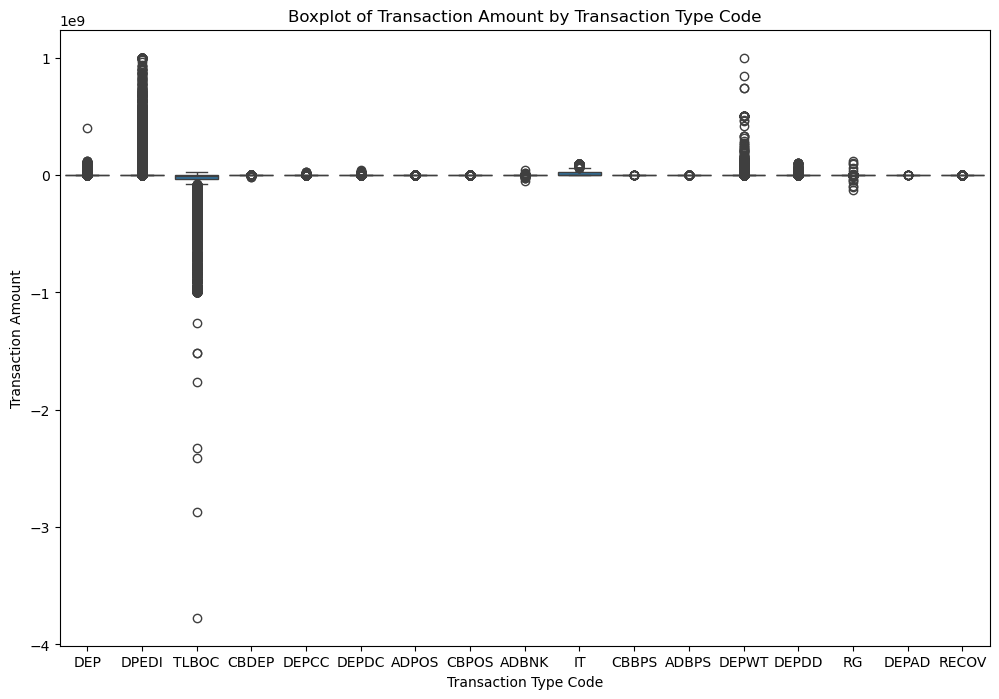

In [25]:
# Boxplot of Financial-Institution-Transaction-Amount by Transaction Type Code
plt.figure(figsize=(12, 8))
sns.boxplot(x='Financial-Institution-Transaction-Type-Code', y='Financial-Institution-Transaction-Amount', data=df)
plt.title('Boxplot of Transaction Amount by Transaction Type Code')
plt.xlabel('Transaction Type Code')
plt.ylabel('Transaction Amount')
plt.show()

Reference-Number                                 int64
Control-Number                                 float64
Financial-Institution-Number                     int64
Deposit-Business-Date                           object
Financial-Institution-Business-Date             object
Financial-Institution-Transaction-Date          object
Financial-Institution-Transaction-Type-Code     object
Financial-Institution-Transaction-Amount       float64
Authorization-Number                            object
dtype: object


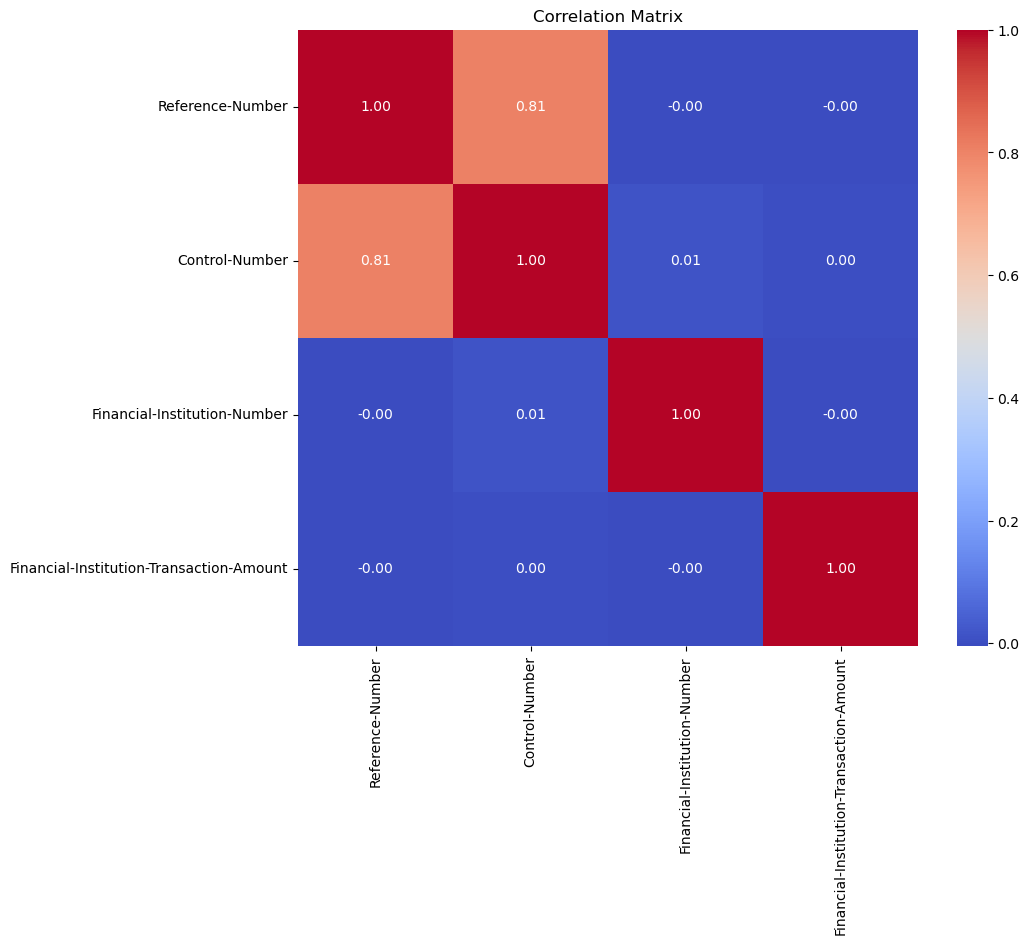

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Assuming df is your DataFrame
# Check the data types of all columns
print(df.dtypes)

# Select only numeric columns for correlation calculation
df_numeric = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


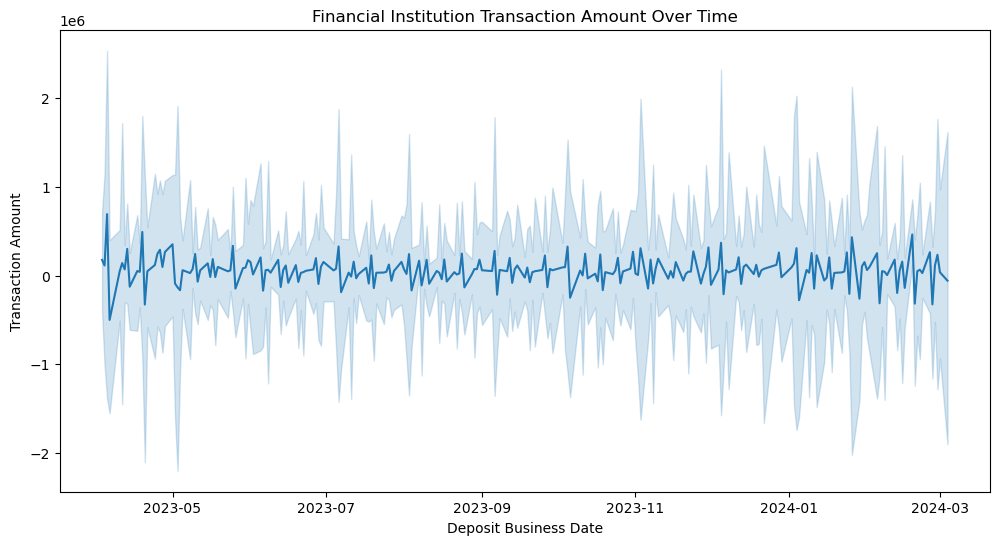

In [28]:
# Convert 'Deposit-Business-Date' to datetime format
df['Deposit-Business-Date'] = pd.to_datetime(df['Deposit-Business-Date'])

# Line plot of Financial-Institution-Transaction-Amount over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Deposit-Business-Date', y='Financial-Institution-Transaction-Amount', data=df)
plt.title('Financial Institution Transaction Amount Over Time')
plt.xlabel('Deposit Business Date')
plt.ylabel('Transaction Amount')
plt.show()

In [34]:
# @title Adding fraud column as a new feature randomly
# Add 'Transaction-Amount-Deviation' column
df['Transaction-Amount-Deviation'] = 0  # Assuming an initial value of 0 for non-fraudulent transactions

# Assuming df is your DataFrame with the provided columns
fraud_percentage = 5

# Step 1: Randomly mark transactions as fraudulent
df['Fraud'] = np.random.choice([0, 1], size=len(df), p=[1 - fraud_percentage/100, fraud_percentage/100])

# Step 2: Optionally, introduce variations for fraudulent transactions
fraudulent_indices = df[df['Fraud'] == 1].index
df.loc[fraudulent_indices, 'Transaction-Amount-Deviation'] += 100  # Increase transaction amount for fraud

# Save the modified DataFrame to a new CSV file
output_file_path = 'synthetic_data_with_fraud.csv'
df.to_csv(output_file_path, index=False)

print(f"\nSynthetic data with fraud generated and saved to {output_file_path}.")


Synthetic data with fraud generated and saved to synthetic_data_with_fraud.csv.


In [35]:
import pandas as pd

# Load the synthetic data with fraud
file_path = 'synthetic_data_with_fraud.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Reference-Number                             1048575 non-null  int64  
 1   Control-Number                               1038798 non-null  float64
 2   Financial-Institution-Number                 1048575 non-null  int64  
 3   Financial-Institution-Business-Date          1048575 non-null  object 
 4   Financial-Institution-Transaction-Date       1048575 non-null  object 
 5   Financial-Institution-Transaction-Type-Code  1048575 non-null  object 
 6   Financial-Institution-Transaction-Amount     1048575 non-null  float64
 7   Authorization-Number                         1047109 non-null  object 
 8   Transaction-Day                              1048575 non-null  int64  
 9   Transaction-Month                            1